In [5]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [6]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-08-18 14:24:47--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.008s  

2024-08-18 14:24:47 (5.74 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, regularizers

df = pd.DataFrame(dataset)

# Separate features and labels
features = df.drop(['expenses'], axis=1)
labels = df['expenses']

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'children']),
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'region'])
    ]
)

# Preprocess the features
X = preprocessor.fit_transform(features)
y = labels.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Build the model
model = tf.keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Linear output
])


# Using a different learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Print the model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 34720444.0000 - mae: 3947.9709 - val_loss: 31183908.0000 - val_mae: 3578.9609
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38472588.0000 - mae: 4055.9019 - val_loss: 31097504.0000 - val_mae: 3587.3418
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34431708.0000 - mae: 3964.2471 - val_loss: 31044442.0000 - val_mae: 3566.7861
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 34422868.0000 - mae: 3837.2263 - val_loss: 31013936.0000 - val_mae: 3566.3604
Epoch 5/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35047880.0000 - mae: 3958.8525 - val_loss: 30952452.0000 - val_mae: 3567.9836
Epoch 6/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30642468.0000 - mae: 3742.5405 - val_loss: 30880060.0000 - val_mae: 3562.6724
Epoch 7/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33833520.0000 - mae: 3891.6235 - val_loss: 30806672.0000 - val_mae: 3564.7815
Epoch 8/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0

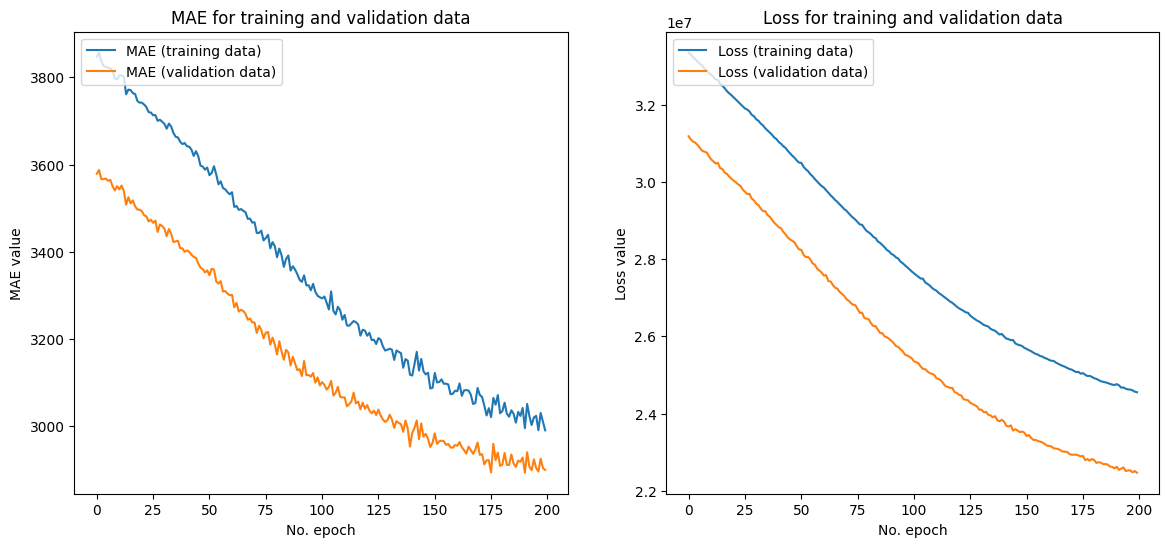

In [33]:
# Train the model
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, verbose=1)

# Plot training history for Loss and MAE
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='MAE (training data)')
plt.plot(history.history['val_mae'], label='MAE (validation data)')
plt.title('MAE for training and validation data')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for training and validation data')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")

plt.show()

9/9 - 0s - 4ms/step - loss: 19992322.0000 - mae: 2800.0337
Testing set Mean Abs Error: 2800.03 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


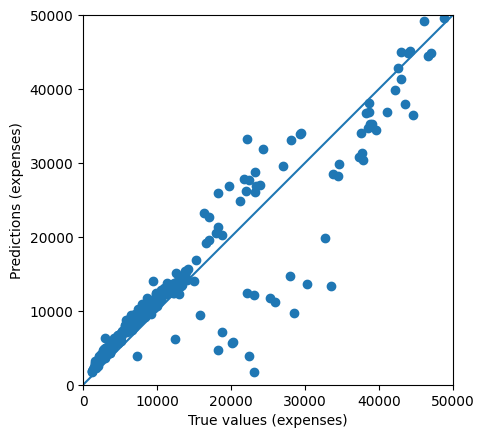

In [35]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
    print("You passed the challenge. Great job!")
else:
    print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions
test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)